In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [72]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips, palette="Set2")
# ax.set_title('test, test, test')

In [7]:
def raw_data_to_dataframe(gpu_data_path, cpu_data_path):
    """
    transfer raw data from test to pandas dataframe 
    example data frame: 
    [put_time]  [thread_num]  [platform]
    0.001           10            GPU-MPI
    0.0001          10            OPEN-MPI 
    ...  
    """
    pd_data = pd.DataFrame(columns = ['put_time', 'thread_num', 'platform'])
    # demo 
    # pd_data = pd_data.append({'sending_time': 0.001, 'thread_num': 10, 'platform': 'GPU-MPI'}, ignore_index=True)
    # pd_data = pd_data.append({'sending_time': 0.0001, 'thread_num': 10, 'platform': 'OPEN-MPI'}, ignore_index=True)

    # read gpu test file
    file = open(gpu_data_path, 'r')
    for line in file.readlines():
        elements = line.strip().split()
        # if the line not starts with '#', then ignored
        if len(elements) == 0 or not elements[0] == '#':
            continue

        row = {
            'put_time': float(elements[4]), 
            'thread_num': int(elements[1]) * 2, 
            'platform': 'GPU-MPI'
        }
        pd_data = pd_data.append(row, ignore_index=True)
    file.close()

    # read cpu test file 
    file = open(cpu_data_path, 'r')
    for line in file.readlines():
        elements = line.strip().split()
        # if the line not starts with '#', then ignored
        if len(elements) == 0 or not elements[0] == '#':
            continue

        row = {
            'put_time': float(elements[4]), 
            'thread_num': int(elements[1]) * 2, 
            'platform': 'OPEN-MPI'
        }
        pd_data = pd_data.append(row, ignore_index=True)
    file.close()

    return pd_data

In [9]:
# read data 
data_path_gpu = 'res_put_benchmark_cuda.txt'
data_path_cpu = 'res_put_benchmark_cpu.txt'
thread_time_data = raw_data_to_dataframe(data_path_gpu, data_path_cpu)

In [10]:
thread_time_data

,put_time,thread_num,platform
0,0.000196,2,GPU-MPI
1,0.000196,2,GPU-MPI
2,0.000196,2,GPU-MPI
3,0.000196,2,GPU-MPI
4,0.000196,2,GPU-MPI
...,...,...,...
993,0.000560,100,OPEN-MPI
994,0.000760,100,OPEN-MPI
995,0.001561,100,OPEN-MPI
996,0.001040,100,OPEN-MPI


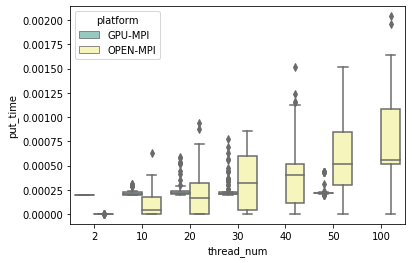

In [62]:
ax = sns.boxplot(x="thread_num", y="put_time", hue='platform', data=thread_time_data, palette="Set3", whis=1.5, showfliers=True)

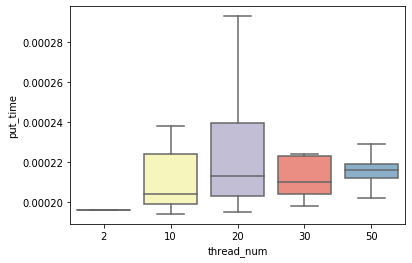

In [71]:
# subplot for gpu put time only 
data_gpu = thread_time_data[thread_time_data['platform'] == 'GPU-MPI']
ax = sns.boxplot(x="thread_num", y="put_time", data=data_gpu, palette="Set3", showfliers=False) 

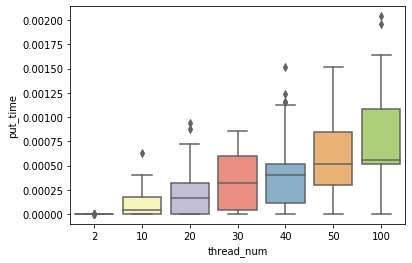

In [18]:
# subplot for cpu put time only 
data_cpu = thread_time_data[thread_time_data['platform'] == 'OPEN-MPI']
ax = sns.boxplot(x="thread_num", y="put_time", data=data_cpu, palette="Set3")

(array([59.,  9.,  6.,  9.,  0.,  0.,  0.,  0., 10.,  2.]),
 array([0.000194 , 0.0002054, 0.0002168, 0.0002282, 0.0002396, 0.000251 ,
        0.0002624, 0.0002738, 0.0002852, 0.0002966, 0.000308 ]),
 <a list of 10 Patch objects>)

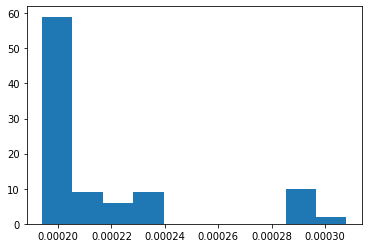

In [48]:
# put time statistics for [gpu] [thread_num = 20/10]
data_select = thread_time_data[thread_time_data['platform'] == 'GPU-MPI']
data_select_10 = data_select[data_select['thread_num'] == 10]
plt.hist(data_select_10['put_time'])

75

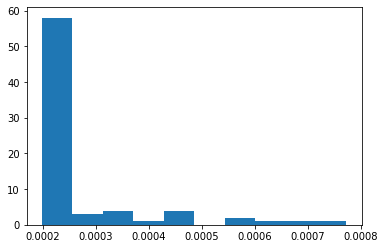

In [67]:
# put time statistics for [gpu] [thread_num = 20/10]
data_select = thread_time_data[thread_time_data['platform'] == 'GPU-MPI']
data_select_30 = data_select[data_select['thread_num'] == 30]
plt.hist(data_select_30['put_time'])
len(data_select_30)